In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [121]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [122]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results.csv False 300


In [123]:
%%time
os.environ["TOKENIZERS_PARALLELISM"] = "true"

!python --version
!pip show torch transformers

Python 3.11.9
Name: torch
Version: 2.4.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, peft, torchaudio, torchvision
---
Name: transformers
Version: 4.43.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenize

In [124]:
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

device = check_gpu()

MPS is available


In [125]:
import pandas as pd

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 78 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   01-ai/Yi-1.5-9B-Chat/rpp-1.00                       1133 non-null   object
 3   01-ai/Yi-1.5-9B-Chat/rpp-1.02                       1133 non-null   object
 4   01-ai/Yi-1.5-9B-Chat/rpp-1.04                       1133 non-null   object
 5   01-ai/Yi-1.5-9B-Chat/rpp-1.06                       1133 non-null   object
 6   01-ai/Yi-1.5-9B-Chat/rpp-1.08                       1133 non-null   object
 7   01-ai/Yi-1.5-9B-Chat/rpp-1.10                       1133 non-null   object
 8   01-ai/Yi-1.5-9B-Chat/rpp-1.12                       1133 non-null   object
 9   01-ai/Yi

In [126]:
columns = df.columns[2:].to_list()
columns.sort()
columns = df.columns[:2].to_list() + columns
columns

['chinese',
 'english',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.00',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.02',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.04',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.06',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.08',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.10',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.12',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.14',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.16',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.18',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.20',
 'Qwen/Qwen2-72B-Instruct/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/rpp-1.06',
 'Qwen/Qwen2-72B-Instruct/rpp-1.08',
 'Qwen/Qwen2-72B-Instruct/rpp-1.10',
 'Qwen/Qwen2-72B-Instruct/rpp-1.12',
 'Qwen/Qwen2-72B-Instruct/rpp-1.14',
 'Qwen/Qwen2-72B-Instruct/rpp-1.16',
 'Qwen/Qwen2-72B-Instruct/rpp-1.18',
 'Qwen/Qwen2-72B-Instruct/rpp-1.20',
 'Qwen/Qwen2-72B-Instruct/rpp-1.22',
 'Qwen/Qwen2-72B-Instruct/rpp-1.24',
 'Qwen/Qwen2-72B-Instruct/rpp-1.26',
 'Qwen/Qwen2-72B-Instruct/rpp-1.28',
 'Qwen/Qwen2-72B-Instruct/rpp-1.30',
 'Qwen/Qwe

In [127]:
df = df[columns]
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens)
metrics_df

01-ai/Yi-1.5-9B-Chat/rpp-1.00: {'meteor': 0.3463725436435439, 'bleu_scores': {'bleu': 0.09312113035602035, 'precisions': [0.37803102247546694, 0.1276225498243425, 0.05633754814082683, 0.027665603967410555], 'brevity_penalty': 1.0, 'length_ratio': 1.0463729711825107, 'translation_length': 31590, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3864918999124817, 'rouge2': 0.14876130386633385, 'rougeL': 0.33279900782244626, 'rougeLsum': 0.33335748341561133}, 'accuracy': 0.0, 'correct_ids': []}
01-ai/Yi-1.5-9B-Chat/rpp-1.02: {'meteor': 0.3471185374158656, 'bleu_scores': {'bleu': 0.09126513887574451, 'precisions': [0.37119079293382423, 0.12507213850593138, 0.055267358339984037, 0.027039160162994683], 'brevity_penalty': 1.0, 'length_ratio': 1.0706525339516395, 'translation_length': 32323, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.38745306941999524, 'rouge2': 0.14924656639497302, 'rougeL': 0.3329223332114953, 'rougeLsum': 0.3336035761622752}, 'accuracy': 0.0, 'correct_i

model   rpp    meteor    bleu_1  \
0                        01-ai/Yi-1.5-9B-Chat  1.00  0.346373  0.093121   
1                        01-ai/Yi-1.5-9B-Chat  1.02  0.347119  0.091265   
2                        01-ai/Yi-1.5-9B-Chat  1.04  0.347188  0.090199   
3                        01-ai/Yi-1.5-9B-Chat  1.06  0.347595  0.090050   
4                        01-ai/Yi-1.5-9B-Chat  1.08  0.347511  0.090048   
..                                        ...   ...       ...       ...   
71  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.22  0.319397  0.080273   
72  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.24  0.318866  0.078780   
73  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.26  0.318051  0.077776   
74  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.28  0.315641  0.074712   
75  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.30  0.314485  0.074847   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.332799        0.0          0.351280           0.351280  0.341256   
1   0.332922        0.0          0.264784           0.264784  0.343223   
2   0.332187        0.0          0.377758           0.377758  0.341686   
3   0.331432        0.0          0.468667           0.468667  0.340815   
4   0.331691        0.0          0.311562           0.311562  0.342942   
..       ...        ...               ...                ...       ...   
71  0.308833        0.0          0.100618           0.100618  0.318015   
72  0.307092        0.0          0.082083           0.082083  0.317738   
73  0.306538        0.0          0.073257           0.073257  0.317046   
74  0.304827        0.0          0.057370           0.057370  0.314859   
75  0.303393        0.0          0.067961           0.067961  0.313562   

    num_max_output_tokens  
0                       2  
1                       4  
2                       8  
3                       9  
4                       4  
..                    ...  
71                      0  
72                      0  
73                      0  
74                      0  
75                      0  

[76 rows x 10 columns]

In [128]:
models = metrics_df["model"].unique()
models

array(['01-ai/Yi-1.5-9B-Chat', 'Qwen/Qwen2-72B-Instruct',
       'Qwen/Qwen2-7B-Instruct', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [129]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

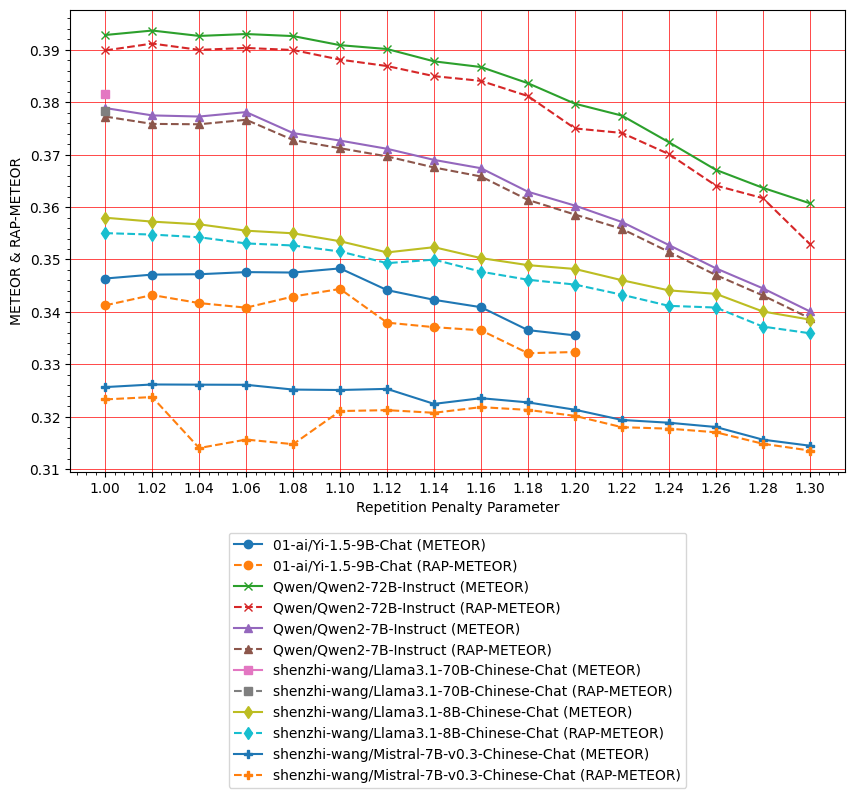

In [130]:
# plot meteor vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(
        model_df["rpp"],
        model_df["meteor"],
        label=model + " (METEOR)",
        marker=markers[model],
    )
    ax.plot(
        model_df["rpp"],
        model_df["rap"],
        label=model + " (RAP-METEOR)",
        linestyle="--",
        marker=markers[model],
    )

ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("METEOR & RAP-METEOR")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.7))
plt.show()

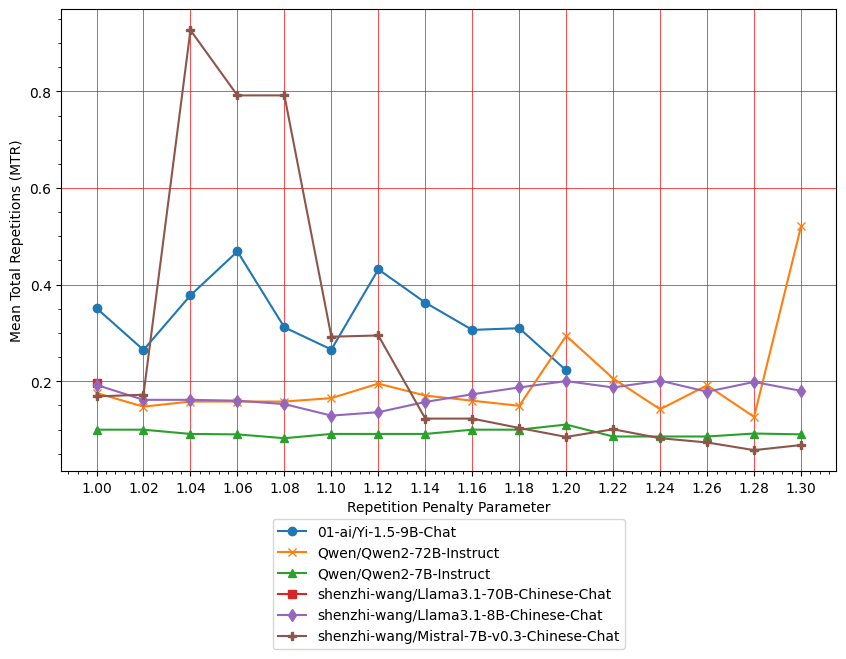

In [131]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(
    which="major", linestyle="-", linewidth="0.5", color="red"
)
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(
        model_df["rpp"],
        model_df["total_repetitions"],
        label=model,
        marker=markers[model],
    )

# ax.set_ylim(0, 1)
ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Mean Total Repetitions (MTR)")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
plt.show()

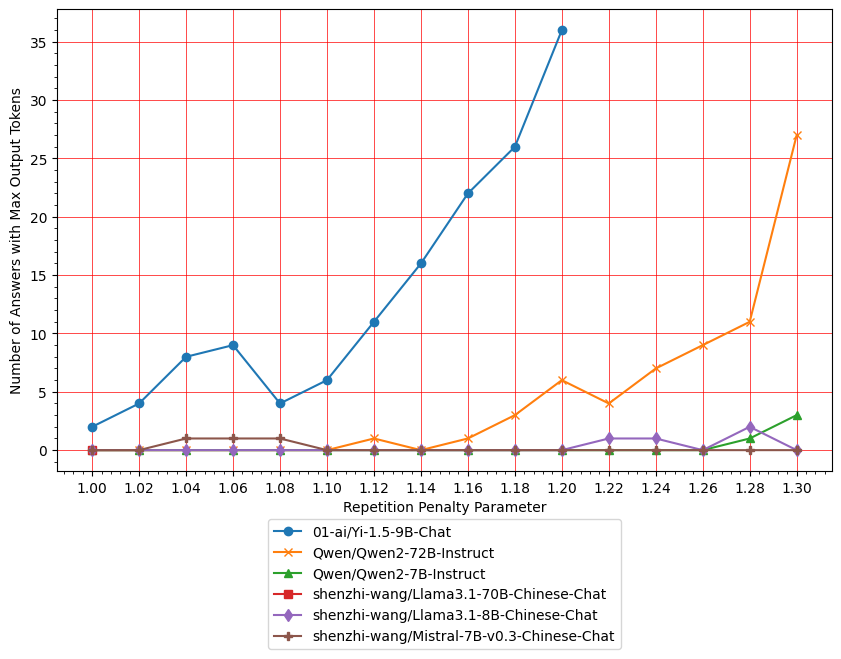

In [132]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(model_df["rpp"], model_df["num_max_output_tokens"], label=model, marker=markers[model])

# ax.set_ylim(0, 1)
ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Number of Answers with Max Output Tokens")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
plt.show()

In [133]:
def detect_repetitions_for_model_outputs(df, col, threshold=100):
    df[["ews_score", "repetition_score", "total_repetitions"]] = df[col].apply(
        detect_scores
    )
    return df.query(f"total_repetitions > {threshold}")

In [134]:
col = "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.04"
rows = detect_repetitions_for_model_outputs(df, col)
rows

chinese                                    english  \
193  “有…… 没有…… 有…… 没有……     'Yes . . . no . . . yes . . . no . . .   
759           我是个什么东西儿!  What sort of creature do you take me for?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.00 01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
193       "Yes…… no…… yes…… no……"       "Yes…… no…… yes…… no……"   
759      What kind of thing am I!      What kind of thing am I!   

    01-ai/Yi-1.5-9B-Chat/rpp-1.04 01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
193       "Yes…… no…… yes…… no……"       "Yes…… no…… yes…… no……"   
759      What kind of thing am I?      What kind of thing am I?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.08 01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
193           "Yes… no… Yes… no…"           "Yes… no… Yes… no…"   
759      What kind of thing am I?      What kind of thing am I?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.12 01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
193           "Yes… no… Yes… no…"           "Yes… no… Yes… No…"  ...   
759      What kind of thing am I?      What kind of thing am I?  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
193                                                142                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
193                                                  9                 
759                                                 15                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.24  \
193                                                  9                 
759                                                 11                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.26  \
193                                                  9                 
759                                                 11                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.28  \
193                                                  9                 
759                                                 36                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.30  
193                                                  9                
759                                                 36                

[2 rows x 166 columns]

In [135]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

“有…… 没有…… 有…… 没有……
'Yes . . . no . . . yes . . . no . . .
Yes, I can help you with that! Here's the translation:

"Yes, I can help you with that! Here's the translation:

有 - Yes
没有 - No

So, the translated content is:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translatio

(0, 784, 784)

In [136]:
row = rows.iloc[1]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

我是个什么东西儿!
What sort of creature do you take me for?
I am a Chinese-English translator. Here is the translation of the text:

"I am a Chinese-English translator. Here is the translation of the text:

"What am I?"

The answer is: "I am a Chinese-English translator."
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(0, 148), match='I am a Chinese-English translator. Here is the tr>
Group 1 found at 0-74: `I am a Chinese-English translator. Here is the translation of the text:

"`
Group 2 found at 74-148: `I am a Chinese-English translator. Here is the translation of the text:

"`
Group 3 found at 74-148: `I am a Chinese-English translator. Here is the translation of the text:

"`
(0, 148, 148)


(0, 148, 148)

In [137]:
col = "Qwen/Qwen2-72B-Instruct/rpp-1.26"
rows = detect_repetitions_for_model_outputs(df, col, threshold=50)
rows

chinese  \
193                                 “有…… 没有…… 有…… 没有……   
327  短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短...   

                                               english  \
193             'Yes . . . no . . . yes . . . no . . .   
327  short-long-long-long-long, short-long-long-lon...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words and numbers: "长长长长...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.04  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.08  \
193                                "Yes… no… Yes… no…"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
193                                "Yes… no… Yes… no…"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.12  \
193                                "Yes… no… Yes… no…"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
193                                "Yes… no… Yes… No…"  ...   
327  This is a sequence of words: "short long long ...  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
193                                                142                 
327                                                 83                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
193                                                  9                 
327                                                 61                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
193                                                  9                 
327                                                 81                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
193                                                  9                 
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
193                                                  9                 
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
193                                                  9                 
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.24  \
193                                                  9                 
327                                                 65                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.26  \
193                                                  9                 
327                                                 64                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.28  \
193                                                  9                 
327                                                120                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.30  
193                                                  9                
327                                                202                

[2 rows x 166 columns]

In [138]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

“有…… 没有…… 有…… 没有……
'Yes . . . no . . . yes . . . no . . .
"There is... There isn't... There is... There isn't..."
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(1, 54), match="There is... There isn't... There is... There isn'>
Group 1 found at 1-27: `There is... There isn't...`
Group 2 found at 28-54: `There is... There isn't...`
Group 3 found at 28-54: `There is... There isn't...`
(0, 53, 53)


(0, 53, 53)

In [139]:
row = rows.iloc[1]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
Short long long long longer, short long long long longer, short short short shorter, long long longer shorter, long long short longer longer, short short longer longer, short short short longer, long long short longer longer, short short short longer, long long short shorter - this is 11:08:21:37. 

(Note: The structure of the sentence seems poetic or code-like; it may not have a direct meaningful translation.)
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(1, 59), match='hort long long long longer, short long long long >
Group 1 found at 1-30: `hort

(0, 224, 224)

In [140]:
output_tokens = f"output_tokens-{col}"
df2 = df[df[output_tokens] >= max_new_tokens][
    ["chinese", "english", col, output_tokens]
]
df2

chinese  \
28                                     你说么，这几年不见，我就忘了。   
41                                          “目标距琴两公里！”   
130  我这份交待材料不少人要看，假如他们看了情不自禁，也去搞破鞋，那倒不伤大雅，要是学会了这个，那...   
133                                         “目标距琴一公里！”   
253                       我和陈清扬在蓝粘土上，闭上眼睛，好像两只海豚在海里游动。   
475                       吕留良提笔沉吟半晌，便在画上振笔直书。 顷刻诗成，诗云：   
546                             这想象力是龙门能跳狗洞能钻的，一无清规戒律。   
757  士隐见女儿越发生得粉装玉琢，乖觉可喜，便伸手接来抱在怀中斗他玩耍一回， 又带至街前，看那过会...   
836  夜色灰葡萄，金风串河道，宝蓝色的天空深邃无边，绿色的星辰格外明亮。 北斗勺子星——北斗主死，...   

                                               english  \
28   It's so many years since I saw you last, I'd f...   
41         'Target is two kilometers from the zither.'   
130  Many people would read my confessions. If afte...   
133         'Target is one kilometer from the zither.'   
253  When Chen Qingyang and I lay on the blue clay ...   
475  He picked up a writing-brush and for some minu...   
546  With the imagination completely free from all ...   
757  Her delicate little pink-and-white face seemed...   
836  On that grey-purple night a golden breeze foll...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.26  \
28   You tell me, these few years we haven't seen e...   
41   "The target is two kilometers away from the pi...   
130  Many people will be reading my statement; if t...   
133  "The target is one kilometer away from the pia...   
253  Wu Hu and Chen Qingyang on the blue clay, eyes...   
475  Lu Liuliang picked up his brush and pondered f...   
546  This imagination knows no bounds or restrictio...   
757  Shi Yin saw that his daughter was growing more...   
836  The night sky is dove gray; golden breezes thr...   

     output_tokens-Qwen/Qwen2-72B-Instruct/rpp-1.26  
28                                              300  
41                                              300  
130                                             300  
133                                             300  
253                                             300  
475                                             300  
546                                             300  
757                                             300  
836                                             300

In [141]:
print_row_details(df2, range(len(df2)))

--------------------------------------------------
chinese: 你说么，这几年不见，我就忘了。
--------------------------------------------------
english: It's so many years since I saw you last, I'd forgotten all about you!
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/rpp-1.26: You tell me, these few years we haven't seen each other, I've forgotten. 

(Note: The translation might sound a bit awkward because it's trying to be as literal as possible with respect to grammar structure of original sentence) A more natural way would probably be "Tell you what, after all those years without seeing each other,  I forgot." or simply "I guess It has been so long since we last met that i have forgotten" . However ,the former is closer meaning wise while latter provides better grammatical accuracy compared against source language syntax rules applied here within this specific context given by user for conversion from one linguistic system (Chinese )to another(English). Therefore both i

In [142]:
col = "01-ai/Yi-1.5-9B-Chat/rpp-1.06"
rows = detect_repetitions_for_model_outputs(df, col, threshold=100)
rows

chinese  \
248                                      我成了替爷们解闷儿的了。”   
327  短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短...   
910                             然而，这城市里的真心，却唯有到流言里去找的。   

                                               english  \
248  I am to become a source of entertainment for t...   
327  short-long-long-long-long, short-long-long-lon...   
910  Only in gossip can the true heart of this city...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
248  I became the one who provides amusement for my...   
327  This is a sequence of words and numbers: "长长长长...   
910  The genuine heart within the city, however, ca...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
248  I became the one who provides amusement for my...   
327  This is a sequence of words: "short long long ...   
910  The genuine heart within the city, however, ca...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.04  \
248  I became the one who provides amusement for my...   
327  This is a sequence of words: "short long long ...   
910  The genuine heart within the city, however, ca...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
248  I became the one who provides amusement for my...   
327  This is a sequence of words: "short long long ...   
910  The genuine heart within this city can only be...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.08  \
248  I became the one who provides amusement for my...   
327  This is a sequence of words: "short long long ...   
910  The genuine heart within this city can only be...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
248  I became the one who provides amusement for my...   
327  This is a sequence of words: "short long long ...   
910  The genuine heart within this city can only be...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.12  \
248  I became the one who provides amusement for my...   
327  This is a sequence of words: "short long long ...   
910  The genuine heart within this city can only be...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
248  I became the one who provides amusement for my...  ...   
327  This is a sequence of words: "short long long ...  ...   
910  The genuine heart within this city can only be...  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
248                                                 17                 
327                                                 83                 
910                                                 20                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
248                                                 17                 
327                                                 61                 
910                                                 20                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
248                                                 17                 
327                                                 81                 
910                                                 20                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
248                                                 17                 
327                                                 71                 
910                                                 20                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
248                                                 17                 
327                                                 71                 
910                                                 20                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
248                                                 17                 
327                                                 71                 
910                                 

In [143]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

我成了替爷们解闷儿的了。”
I am to become a source of entertainment for the menfolk now, it seems.'
I became the one who provides amusement for my master." 0.9995436269802856 0.9995436269802856 I apologize for the repetition. Here is the translated content without any additional information:

I became the one who provides amusement for my master. 0.9995436269802856 0.9995436269802856 The translation is complete. 0.9995436269802856 0.9995436269802856
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(55, 94), match=' 0.9995436269802856 0.9995436269802856 '>
Group 1 found at 55-74: ` 0.9995436269802856`
Group 2 found at 74-94: ` 0.9995436269802856 `
Group 3 found at 74-93: ` 0.9995436269802856`
<re.Match object; span=(248, 287), match=' 0.9995436269802856 0.9995436269802856 '>
Group 1 found at 248-267: ` 0.9995436269802856`
Group 2 found at 267-287: ` 0.9995436269802856 `
Group 3 found at 267-286: ` 0.9995436269802856`
<re.Match object; span=(315, 353), match

(0, 116, 116)

In [144]:
row = rows.iloc[1]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
This is a sequence of words: "short long long long, short long long long, short short short short, long long short short, long short short long long, short short short long, long short short long long, short short short long, long short short short," followed by the time "1108:21:37."
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(30, 74), match='short long long long, short long long long, '>
Group 1 found at 30-52: `short long long long, `
Group 2 found at 52-74: `short long long long, `
Group 3 found at 52-74: `short long long long, `
<re.Match obj

(0, 206, 206)

In [145]:
row = rows.iloc[2]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

然而，这城市里的真心，却唯有到流言里去找的。
Only in gossip can the true heart of this city be found.
The genuine heart within this city can only be found in rumors. 12345678 9101112131415 16171819202122 23242526272829 The genuine heart within this city can only be found in rumors. 12345678 9101112131415 16171819202122 23242526272829 303132333435 In the bustling city of endless noise and clamor, it is often said that one's true self is revealed through the whispers and gossip of others. These tales, carried by the wind and shared among the masses, paint a picture of our lives that is both beautiful and sometimes tarnished. They are the echoes of our actions, the reflections of our hearts, and the witnesses to our journey.

In such a world, where every step we take is scrutinized and every word we utter is analyzed, the authenticity of our being becomes elusive. It is not that we have lost touch with
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(0, 234), match='

(0, 234, 234)

In [146]:
output_tokens = f"output_tokens-{col}"
df2 = df[df[output_tokens] >= max_new_tokens][
    ["chinese", "english", col, output_tokens]
]
df2

chinese  \
120                               说起爱因斯坦，你比我有更多的东西需要交待。   
167                              钱老板道：“正是。 沐王府小公爷的嫡亲妹子。   
238                      彼此的梦里都做过无数回，那梦里的人都不大像了，还不如不梦见。   
260   那刘姥姥先听见告艰苦，只当是没想头了， 又听见给他二十两银子，喜的眉开眼笑道：“我们也知道艰...   
438                         躺在漏雨的草屋里，听着远处的狼叫，慢慢从梦里回到现实。   
611                       韦小宝暗暗叫苦：“原来做太监要净身，那就是割去小便的东西。   
614                              在我看来，这东西无比重要，就如我之存在本身。   
621      顾炎武道：“晚村兄豪气干云，令人好生敬佩。 怕的是见不到鞑子皇帝，却死于一般的下贱奴才手里。   
1005  沙瑞山说着，在终端上忙活起来，很快屏幕上出现一条平直的绿线，“你看，这就是当前宇宙整体背景辐...   

                                                english  \
120   But you actually have more to confess about Ei...   
167   'Young Lord Mu's little sister,' said Butcher ...   
238   They had appeared in each other's dreams, but ...   
260   When Grannie Liu heard Xi-feng talk about 'dif...   
438   We lay in leaky straw huts and listened to wol...   
611   Trinket was horrified. 'So that's what being '...   
614   To me, the thing was extremely important, as i...   
621   'I admire your heroic spirit,' said Gu, 'but I...   
1005  As he spoke, Sha typed quickly at the terminal...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
120   When it comes to Einstein, I have more things ...   
167   The translation of the given Chinese text is: ...   
238   In each other's dreams, countless times have b...   
260   First, I will identify the key phrases and wor...   
438   Lying in the leaky thatched hut, listening to ...   
611   韦小宝暗暗叫苦：“原来做太监要净身，那就是割去小便的东西。"\n\nThe translat...   
614   In my opinion, this thing is infinitely import...   
621   Gǔ yínhuǒ dào: "Wǎnshù xū hēiqì gān yún, rén y...   
1005  Shā Rui Shān zhēn shuō, zài jízhōng biaó huò l...   

      output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.06  
120                                           305  
167                                           310  
238                                           308  
260                                           310  
438                                           311  
611                                           307  
614                                           306  
621                                           311  
1005                                          314

In [147]:
print_row_details(df2, range(len(df2)))

--------------------------------------------------
chinese: 说起爱因斯坦，你比我有更多的东西需要交待。
--------------------------------------------------
english: But you actually have more to confess about Einstein than I do.
--------------------------------------------------
01-ai/Yi-1.5-9B-Chat/rpp-1.06: When it comes to Einstein, I have more things to explain to you than you do. 1. I began by identifying the task, which is to translate a given Chinese text into English while providing only the translated content.
2. I carefully read and analyzed the Chinese text to understand its meaning.
3. I translated the text into English while maintaining the original meaning and context.
4. I provided the translated content as requested, ensuring that no additional information was included. 1. Task: Translate a given Chinese text into English while providing only the translated content.
2. Input: Chinese text - "说起爱因斯坦， 你比我有更多的东西需要交待。"
3. Process: Translate the text while preserving the original meaning and conte

In [148]:
df.describe()

ground_truth_ews_score  ground_truth_repetition_score  \
count                  1133.0                    1133.000000   
mean                      0.0                       0.312445   
std                       0.0                       7.193649   
min                       0.0                       0.000000   
25%                       0.0                       0.000000   
50%                       0.0                       0.000000   
75%                       0.0                       0.000000   
max                       0.0                     239.000000   

       ground_truth_total_repetitions  ews_score  repetition_score  \
count                     1133.000000     1133.0       1133.000000   
mean                         0.312445        0.0          0.659312   
std                          7.193649        0.0         10.069919   
min                          0.000000        0.0          0.000000   
25%                          0.000000        0.0          0.000000   
50%                          0.000000        0.0          0.000000   
75%                          0.000000        0.0          0.000000   
max                        239.000000        0.0        234.000000   

       total_repetitions  ground_truth_tokens-01-ai/Yi-1.5-9B-Chat  \
count        1133.000000                               1133.000000   
mean            0.659312                                 33.044131   
std            10.069919                                 22.889653   
min             0.000000                                  1.000000   
25%             0.000000                                 17.000000   
50%             0.000000                                 28.000000   
75%             0.000000                                 42.000000   
max           234.000000                                154.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
count                                  1133.000000   
mean                                     35.954104   
std                                      31.319419   
min                                       1.000000   
25%                                      18.000000   
50%                                      28.000000   
75%                                      44.000000   
max                                     320.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
count                                  1133.000000   
mean                                     36.389232   
std                                      33.350099   
min                                       1.000000   
25%                                      18.000000   
50%                                      28.000000   
75%                                      44.000000   
max                                     332.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.04  ...  \
count                                  1133.000000  ...   
mean                                     37.240953  ...   
std                                      36.431663  ...   
min                                       1.000000  ...   
25%                                      18.000000  ...   
50%                                      28.000000  ...   
75%                                      44.000000  ...   
max                                     326.000000  ...   

       output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
count                                        1133.000000                  
mean                                           32.159753                  
std                                            22.421439                  
min                                             3.000000                  
25%                                            17.000000                  
50%                                            27.000000                  
75%                                            41.000000                  
max                                           212.000000      

In [149]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)